<B>PROJECT: AIRLINE QUALITY RATING</B>

<B>TABLE OF CONTENTS</B>

--Introduction

-Data Wrangling

-Exploratory Data Analysis

-Conclusions

<B>INTRODUCTION</B>

<U><B>Dataset Description:</U></B>

Passenger satisfaction is measured by more than 120,000 airline passengers, including additional information about each passenger, their flight and type of travel, as well as ratings on various factors such as cleanliness, comfort, service and overall experience.


<U><B>Dataset Dictionary</U></B>
    
<U><B>Columns:</U></B>

ID: Passenger ID

Gender: Passenger gender

Age: Passenger age

Customer Type: The customer type

Type of Travel: Purpose of the flight of the passengers

Class: Travel class in the plane of the passengers

Flight Distance: Flight distance

Departure Delay: Minutes delayed when departure

Arrival Delay: Minutes delayed when Arrival

Departure & Arrival Time Сonvenience: Convenience of departure and arrival times for passengers

Ease of Online Booking: Easy to book

Check-in Service: Ease of registration

Online Boarding: Convenience of online registration

Gate Location: Gate Location Estimation

On-board Service: Service on board

Seat Comfort: Comfortable seating

Leg Room Service: Leg room service level

Cleanliness: Cleanliness level

Food and Drink: Quality of food and drinks

In-flight Service: Level of service on board

In-flight Wifi Service: Wifi quality level on board

In-flight Entertainment: Rating of in-flight entertainment

Baggage Handling: Opinion on baggage handling

Satisfaction: Airline satisfaction level

<U><B>Questions For Analysis</U></B

<U>Overall Satisfaction</U>
What is the distribution of overall satisfaction levels among passengers?
Are there any significant differences in overall satisfaction levels across different classes (Economy, Business, First Class)?

<U>Demographic Insights</U>
How does passenger satisfaction vary by gender?
Is there a significant relationship between age and passenger satisfaction?

<U>Travel Class Insights</U>
Compare satisfaction levels across different travel classes (Economy, Business, First Class). What patterns can you observe?
How do different aspects of the flight (e.g., Seat Comfort, In-flight Entertainment) contribute to satisfaction within each travel class?

<U>Delay Impact</U>
Examine the correlation between departure delay and arrival delay. How strong is the relationship?
Analyze the impact of departure and arrival delays on overall passenger satisfaction. Are passengers with delays more likely to be dissatisfied?

<U>Service Quality</U>
Which factors (e.g., Online Boarding, Food and Drink, Seat Comfort) are most strongly associated with high levels of passenger satisfaction?
Identify the top three service factors that contribute to passenger dissatisfaction.

<U>Travel Purpose Insights</U>
Is there a significant difference in satisfaction levels between passengers traveling for business versus personal reasons?


<U>Convenience Factors</U>
How does the convenience of departure and arrival times affect overall satisfaction?
Assess the impact of ease of online booking on passenger satisfaction. How does it compare to other service factors?

<U>Distance Impact</U>
What is the relationship between flight distance and passenger satisfaction? Are longer flights associated with higher or lower satisfaction?
Analyze how flight distance influences satisfaction in different travel classes.






<B><u>Importing the packages to be used</B></u>

In [4]:
#Import Required Libraries
import pandas as pd
import numpy as numpy
import matplotlib as plt
import seaborn as sns
%matplotlib inline

<B>DATA WRANGLING</B>

In this section,we would try to point out instances and occurences in the dataset that might need some cleaning and wrangling.To do this we would proceed by first loading the dataset into the workspace and then reading it to have a first view of what the data look like

In [27]:
df_data=pd.read_excel("C:\\Users\\terem\\OneDrive\\Desktop\\Data Analysis\\Airline Quality Ratings.xlsx")
df_data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


From the cell above, we can tell that the dataset contains 129880 rows and 24 columns. We can also draw some insights into the wrangling and cleansing procedures we might adopt to make the dataset suitale for analysis. Before we proceed to wrangling, we need to establish the columns that would be necessary for our exploration in order to know what columns needs to be gotten rid of:

The 'ID' column would serve as a pointer to how many unique passengers we have in the dataset.
The 'Type of Travel' column let's us know what the pupose of the trip will be categorize as(i.e Business or Personal)
'Gender' and 'Age' would be extremely helpful in determining if the sex of the passenger had a role to play in the overall satisfaction
'Arrival Delay' and 'Departure Delay' seem necessary as the information provided seem consistent(most of the delays can affect a passenger's satisfaction)
'Satisfaction' denotes satisfaction ratings.
Let's proceed to checking the dataset in more depth in order to further draft out wrangling and cleansing techniques.

In [49]:
# checking the non null values and data types of the data set
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

Looking above, there are no null values in the entire dataset. As for the data types, virtually all the columns are in their appropriate data type.

In [30]:
#Checking for unique values in each column
df_data.nunique()

ID                                        129880
Gender                                         2
Age                                           75
Customer Type                                  2
Type of Travel                                 2
Class                                          3
Flight Distance                             3821
Departure Delay                              466
Arrival Delay                                472
Departure and Arrival Time Convenience         6
Ease of Online Booking                         6
Check-in Service                               6
Online Boarding                                6
Gate Location                                  6
On-board Service                               6
Seat Comfort                                   6
Leg Room Service                               6
Cleanliness                                    6
Food and Drink                                 6
In-flight Service                              6
In-flight Wifi Servi

-The cell above shows 129880 unique IDs(i.e passengers) and 75 unique Age.This could mean that each passenger can have unique or the same age. 

-Also, the travel type depends on the purpose of a particular passenger's flight, weather it's a business trip or just a personal vacation.

-From 'Departure and Arrival Time Convenience' to 'Satisfaction',we can observe the ratings of satisfaction(i.e'0-5') from their respective criterias

In [50]:
# getting the basic statistics and aggregations of the numerical columns in the dataset
df_data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


The cell above helps in checking the count, min, standard deviation and percentiles for all the columns with numbers in them.Take for example,the 'Age' column.Where the oldest unique age of a passenger in the airline is 85,while the least being that of a 7 year old.The arrival delay(in minutes) is also another thing to look at.The longest time(max)of arrival from an airline is 1592 minutes.We can tell that the passenger experienced a significant delay of 1592 minutes, which equates to over 26 hours. This extended wait time likely disrupted their schedule, potentially causing frustration and impacting their overall satisfaction, especially if they had prior commitments.From this brief descriptions from the data,we can move on to the next phase.


In [51]:
#checking just the headers
df_data.head(0)


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction


<u><b>DATA CLEANING</u></b>


Now that we've figured out the process to take in cleaning the data to make it suitable for analysis in the data wrangling section above, let's dive right into cleaning the data. 

-Make all column names lowercase.

-Rename the columns and make them consistent.

Now let's dive right into cleaning.

In [110]:
df_data.columns

Index(['ID', 'Gender', 'Age', 'Customer_type', 'Travel_type', 'Class',
       'Flight_Distance', 'Departure_delay', 'Arrival_delay',
       'Departure_&_Arrival_time_delay', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On_board_service', 'Seat_comfort', 'Leg_room_service', 'Cleanliness',
       'Food_&_drinks', 'In_flight_service', 'In_flight_wifi_service',
       'In_flight_entertainment', 'Baggage_handling', 'Satisfaction'],
      dtype='object')

In [111]:
# The pandas rename function is used here to rename more than one column in the dataframe

df_data.rename(columns = {'Ease of Online Booking':'Ease_of_online_booking','Check-in Service':'Check_in_service','Online Boarding':'Online_boarding','Gate Location':'Gate_location',
                          'Departure_&_Arrival_time_delay':'Departure_&_Arrival_time_delay_convenience'
                          
                          }, inplace=True)
df_data.head(0)

,ID,Gender,Age,Customer_type,Travel_type,Class,Flight_Distance,Departure_delay,Arrival_delay,Departure_&_Arrival_time_delay_convenience,...,On_board_service,Seat_comfort,Leg_room_service,Cleanliness,Food_&_drinks,In_flight_service,In_flight_wifi_service,In_flight_entertainment,Baggage_handling,Satisfaction


In [112]:

df_data.head()

,ID,Gender,Age,Customer_type,Travel_type,Class,Flight_Distance,Departure_delay,Arrival_delay,Departure_&_Arrival_time_delay_convenience,...,On_board_service,Seat_comfort,Leg_room_service,Cleanliness,Food_&_drinks,In_flight_service,In_flight_wifi_service,In_flight_entertainment,Baggage_handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


<B><U>EXPLORATORY DATA ANALYSIS</b></U>

In this section we would be diving deep into the questions that were posed earlier and how we can answer the questions with the data available using apporpriate visuals and chart types. Firstly, let's plot a basic histogram with the numerical variables available in the dataset.

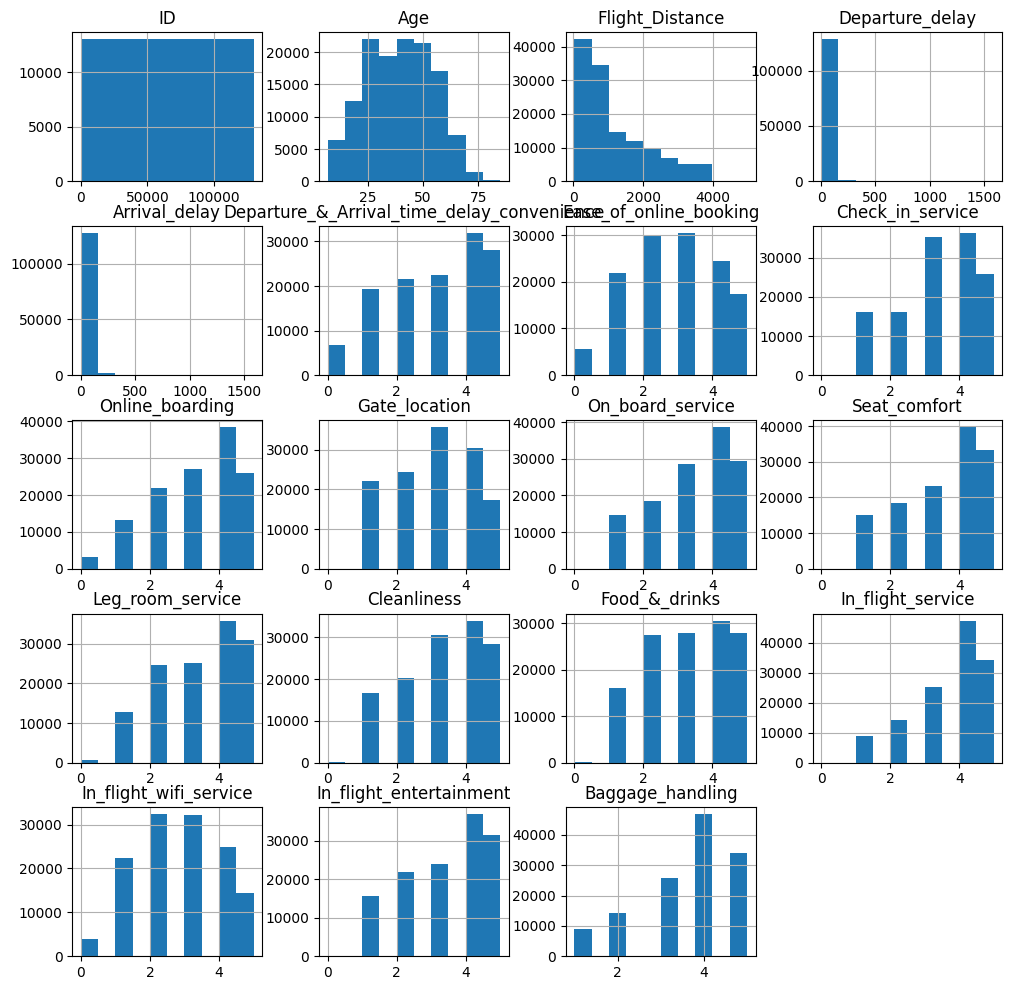

In [113]:
# plotting a simple histogram of the entire dataset using the hist function
df_data.hist(figsize=[12,12]);

<b><u>Research Question 1: On Overall Satisfaction</b></u>



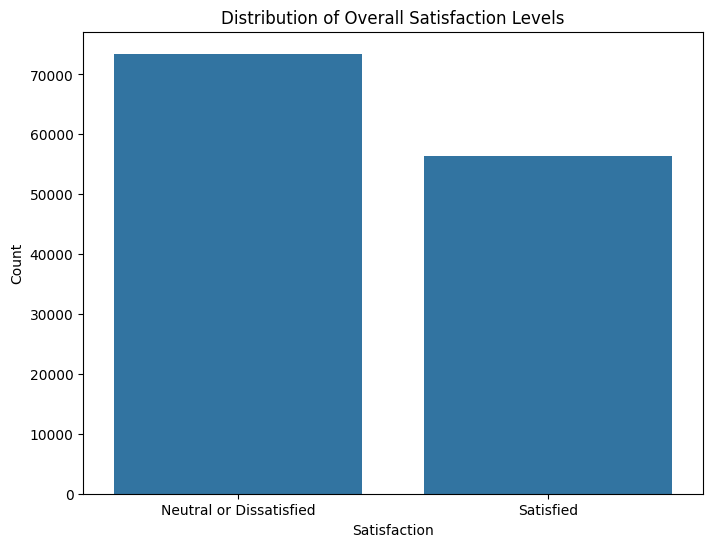

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of overall satisfaction(Amongst Passengers)
plt.figure(figsize=(8, 6))
sns.countplot(x='Satisfaction', data=df_data)
plt.title('Distribution of Overall Satisfaction Levels')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

The Higher Count of Neutral or Dissatisfied Responses suggests that a significant portion of passengers might not be completely satisfied with their airline experience. Reasons for this could include various factors such as service quality, delays, comfort, or other aspects of the flight experience that did not meet expectations.

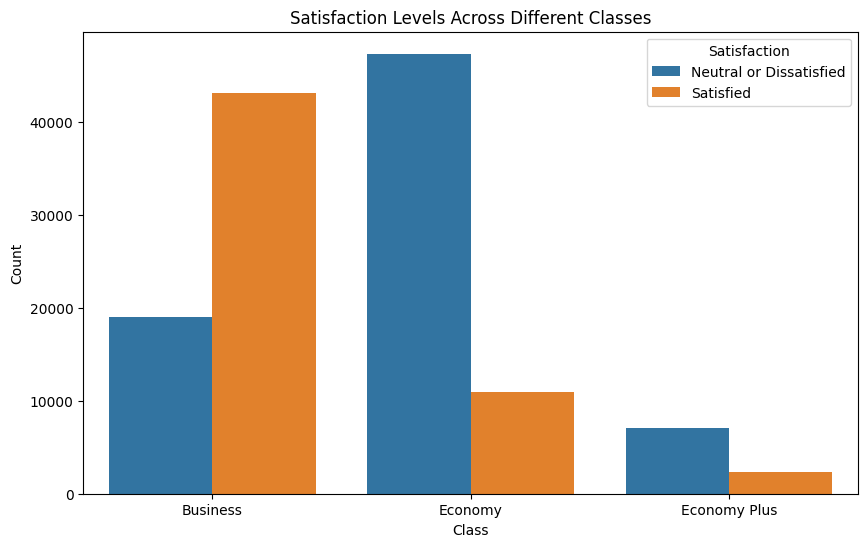

In [146]:
# Satisfaction across different classes(Economy,Business,First Class)
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', hue='Satisfaction', data=df_data)
plt.title('Satisfaction Levels Across Different Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()

The analysis reveals that Business class passengers generally report higher levels of satisfaction compared to Economy and Economy Plus classes. In contrast, Economy class shows a higher prevalence of neutral or dissatisfaction among passengers. These findings highlight opportunities for the airline to focus on enhancing service quality and amenities, particularly in Economy class, to improve overall passenger satisfaction and loyalty. Understanding these disparities allows for targeted improvements that can better meet the expectations of passengers across different travel classes, potentially enhancing competitive positioning and customer retention efforts.


<u><b>Research Question 2: Demographic Insights</u></b>

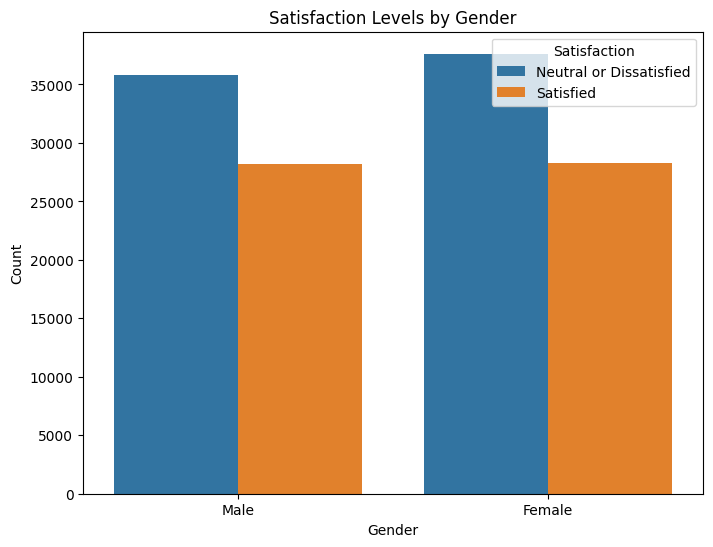

In [116]:
# Satisfaction by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Satisfaction', data=df_data)
plt.title('Satisfaction Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()

Both male and female passengers show a higher prevalence of neutral or dissatisfaction compared to satisfaction. However, females exhibit a notably higher dissatisfaction rate than males. This highlights an opportunity for the airline to address specific concerns or improve service quality that may disproportionately affect female passengers' satisfaction levels.

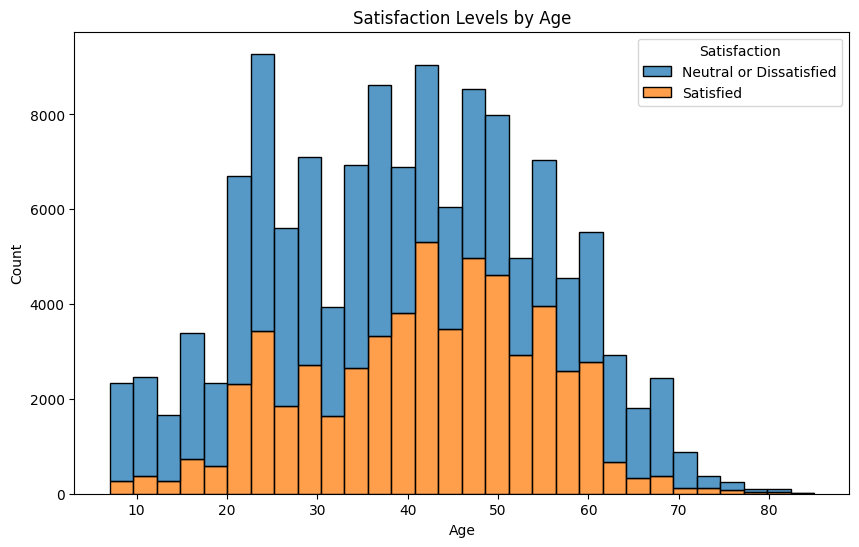

In [117]:
# Relationship between age and Passenger 'satisfaction.'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_data, x='Age', hue='Satisfaction', multiple='stack', bins=30)
plt.title('Satisfaction Levels by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The analysis reveals a variation in satisfaction and dissatisfaction levels across different age groups, as observed from a combined bar chart. Generally, satisfaction levels appear to be high, especially among passengers in their early 20s. However, dissatisfaction begins to increase noticeably from the mid-30s to the 60s, although there remains some level of satisfaction within these age groups.This pattern suggests that younger passengers tend to express higher satisfaction, possibly influenced by factors like travel experience expectations or service preferences. In contrast, older passengers show increasing levels of dissatisfaction, indicating potential areas where the airline could focus on improving service quality or addressing specific concerns related to this demographic.


<b><u>Research Question 3:Travel Class Insights </b></u>


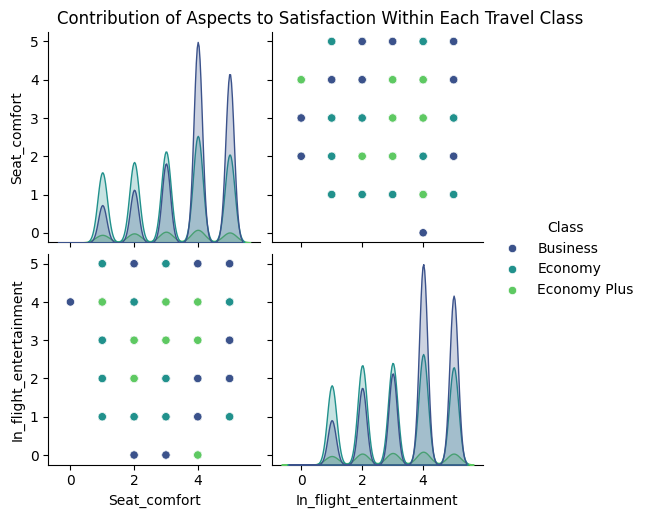

In [147]:
# Pairplot of relevant aspects by Class
#What patterns can you observe? How do different aspects of the flight (e.g., Seat Comfort, In-flight Entertainment) contribute to satisfaction within each travel class?
sns.pairplot(df_data, vars=['Seat_comfort', 'In_flight_entertainment'], hue='Class', palette='viridis')
plt.suptitle('Contribution of Aspects to Satisfaction Within Each Travel Class', y=1.02)
plt.show()


This shows satisfaction levels within different class types.Take for example ,in the 'Business' Class,there seems to be a higher levels of satisfaction compared to other class types

<b></u>Research Question 4: Delay Impact <b></u>


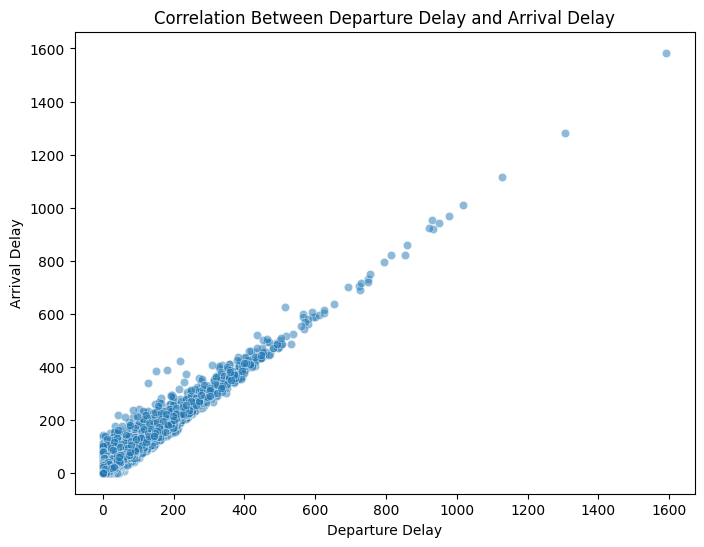

In [148]:
# Scatter plot of Departure Delay vs Arrival Delay
#Examine the correlation between departure delay and arrival delay. How strong is the relationship?
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Departure_delay', y='Arrival_delay', data=df_data, alpha=0.5)
plt.title('Correlation Between Departure Delay and Arrival Delay')
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.show()


The scatterplot shows a strong relationship between departure delay and arrival delay. When a flight is delayed at departure, it typically experiences a corresponding delay upon arrival. This strong correlation is visually represented by closely packed circles at the beginning of the graph, dispersing into smaller ones later on. This pattern indicates that delays at departure significantly influence delays at arrival, highlighting the reliability of departure delay as a predictor for arrival delay in flight operations.

<b><u>Research Question 5: Service Quality</b></u> 


C:\Users\terem\AppData\Local\Temp\ipykernel_12716\2400043800.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_factors, y=df_data[service_factors].mean(), palette='viridis')


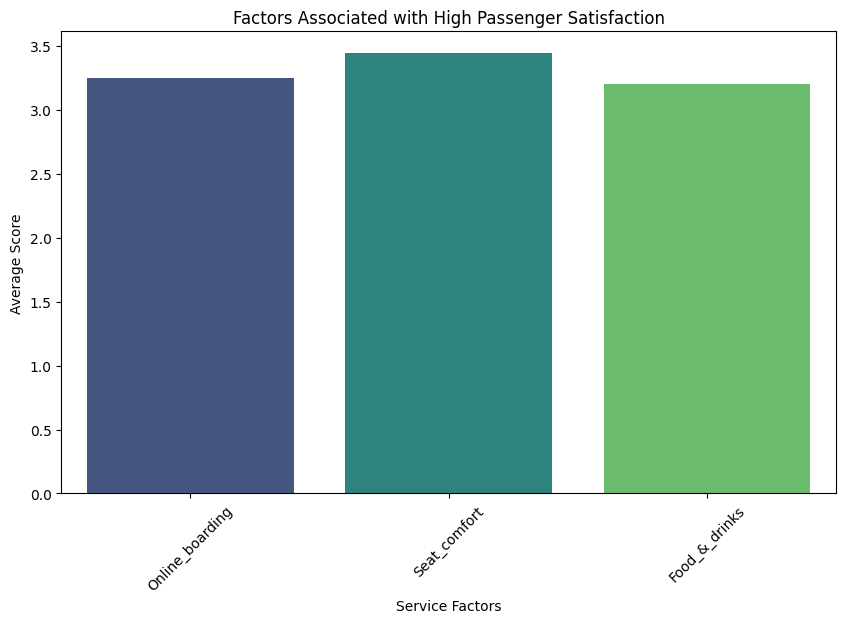

In [152]:
# Bar plot of Service Factors
#Which factors (e.g., Online Boarding, Food and Drink, Seat Comfort) are most strongly associated with high levels of passenger satisfaction? Identify the top three service factors that contribute to passenger dissatisfaction.
service_factors = ['Online_boarding', 'Seat_comfort', 'Food_&_drinks']
plt.figure(figsize=(10, 6))
sns.barplot(x=service_factors, y=df_data[service_factors].mean(), palette='viridis')
plt.title('Factors Associated with High Passenger Satisfaction')
plt.xlabel('Service Factors')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


Seat satisfaction is identified as the most critical factor influencing overall passenger satisfaction, highlighting the significant impact of comfort and seating experience on passenger perceptions. Following closely, online boarding and the efficiency of the booking process contribute prominently to satisfaction levels. Food and drink offerings, while still important, are perceived as slightly less influential compared to seat comfort and online booking processes.

Understanding these key factors should allow airlines to prioritize enhancements that directly impact passenger satisfaction, thereby improving the overall travel experience and fostering customer loyalty.

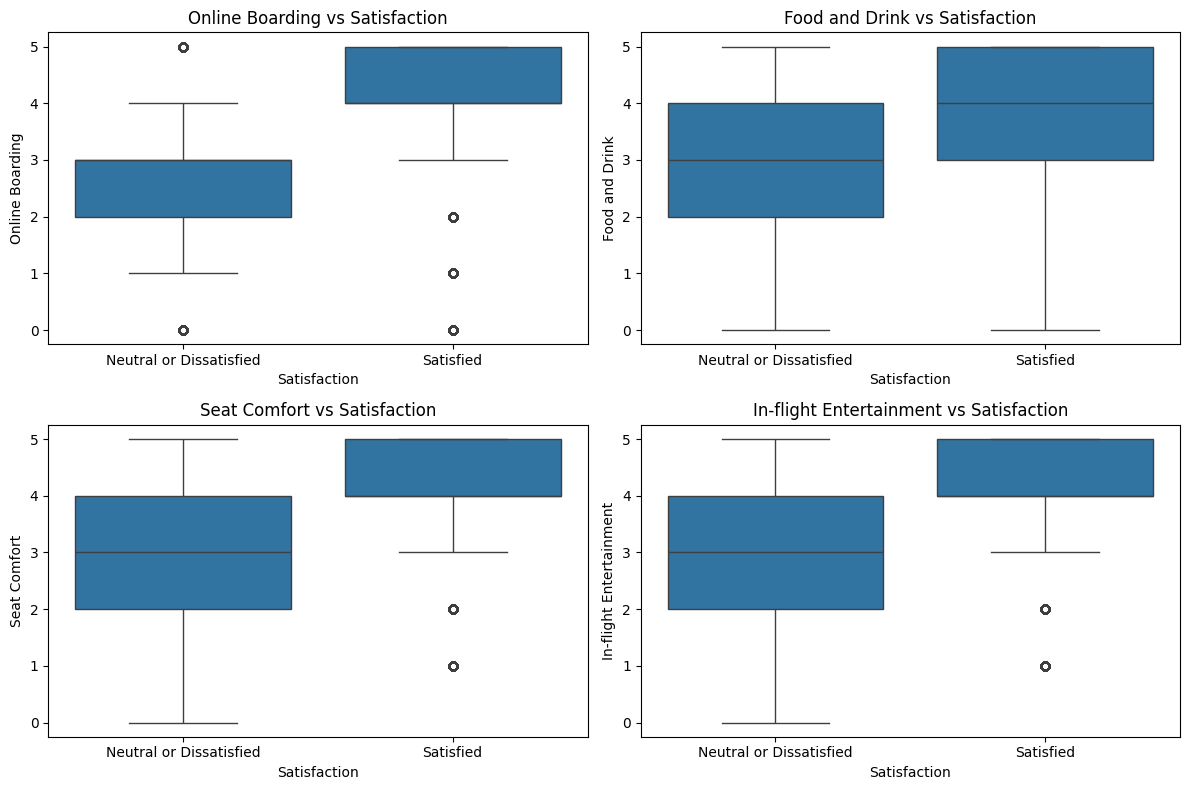

In [42]:
# Service quality factors related to satisfaction
service_factors = ['Online Boarding', 'Food and Drink', 'Seat Comfort', 'In-flight Entertainment']

plt.figure(figsize=(12, 8))
for i, factor in enumerate(service_factors, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Satisfaction', y=factor, data=df_data)
    plt.title(f'{factor} vs Satisfaction')

plt.tight_layout()
plt.show()




-Food and Drink: 
Shows consistent satisfaction levels among passengers, indicated by similar box sizes.

- Seat Comfort:
Reveals varying satisfaction levels, with some passengers experiencing higher discomfort, as shown by the spread in the box plot.

- In-flight Entertainment:
Demonstrates variability in satisfaction levels, with differences among passengers in how easily entertained they are during flights.


- Online Boarding: Indicates consistent satisfaction levels with the online boarding process, as there is no significant difference shown in the box plot.



C:\Users\terem\AppData\Local\Temp\ipykernel_12716\2193215691.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dissatisfaction_factors, y=df_data[dissatisfaction_factors].mean(), palette='viridis')


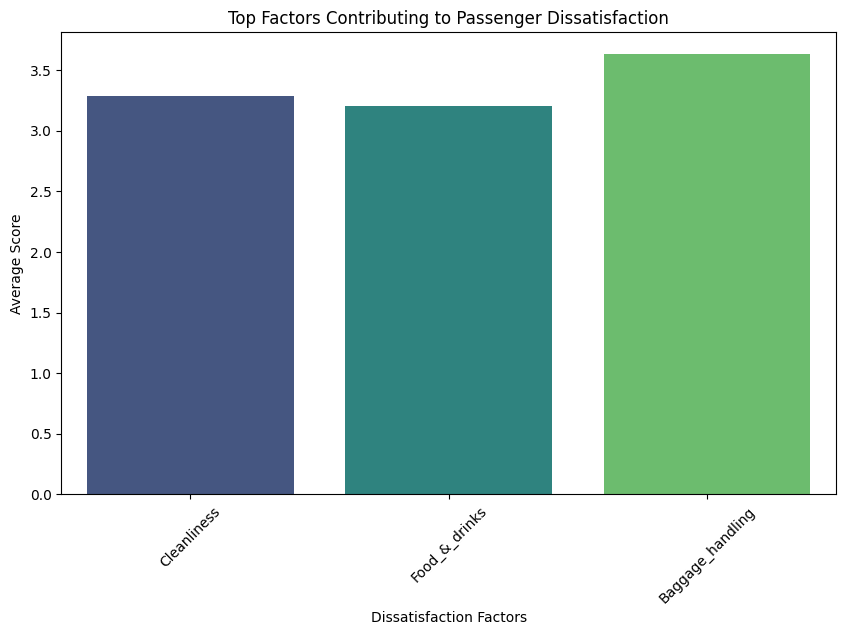

In [134]:
# Bar plot of Dissatisfaction Factors
dissatisfaction_factors = ['Cleanliness', 'Food_&_drinks', 'Baggage_handling']
plt.figure(figsize=(10, 6))
sns.barplot(x=dissatisfaction_factors, y=df_data[dissatisfaction_factors].mean(), palette='viridis')
plt.title('Top Factors Contributing to Passenger Dissatisfaction')
plt.xlabel('Dissatisfaction Factors')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


-Baggage Handling:
Identified as the primary cause of passenger dissatisfaction, highlighting issues such as delays, damages, or loss of baggage.

-Cleanliness: The cleanliness of toilets and aircraft cabins ranks second in influencing dissatisfaction levels, emphasizing the importance of maintaining high cleanliness standards.

-Food and Drinks: While important, the taste and quality of onboard food and beverages are perceived as slightly less critical compared to baggage handling and cleanliness.

Addressing these factors effectively allows airlines to prioritize improvements that directly impact passenger satisfaction, thereby enhancing the overall travel experience and customer loyalty.

<b><u>Research Question 6: Travel Purpose Insights</b></u> 

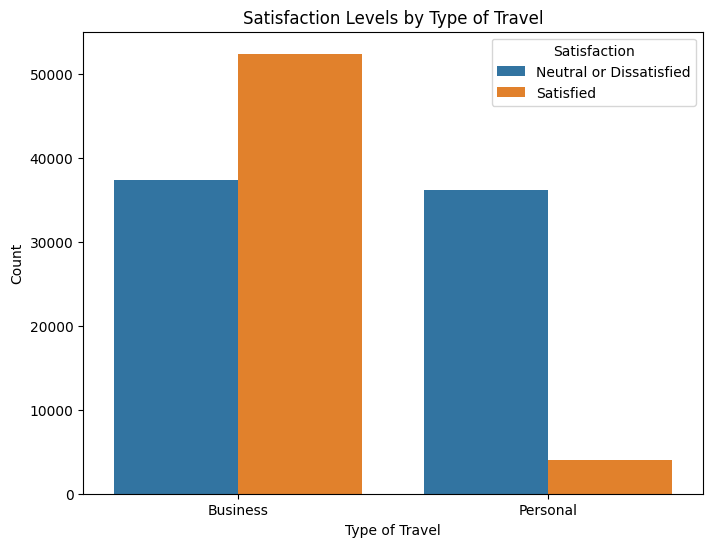

In [158]:

# Satisfaction levels between business and personal travel
plt.figure(figsize=(8, 6))
sns.countplot(x='Travel_type', hue='Satisfaction', data=df_data)
plt.title('Satisfaction Levels by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()


Te analysis indicates that satisfaction levels are higher among passengers traveling for business purposes compared to those traveling for personal reasons. This suggests an opportunity for the airline to shift focus towards enhancing the satisfaction of passengers traveling for personal trips. By addressing specific needs and preferences of leisure travelers, such as comfort, entertainment options, and overall experience enhancements, the airline can potentially increase satisfaction levels in this segment. This strategic adjustment could lead to improved customer retention and loyalty among leisure travelers, contributing to overall business success and competitiveness in the airline industry.

C:\Users\terem\AppData\Local\Temp\ipykernel_12716\2864869050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer_type', y='Satisfaction', data=df_data, palette='viridis')


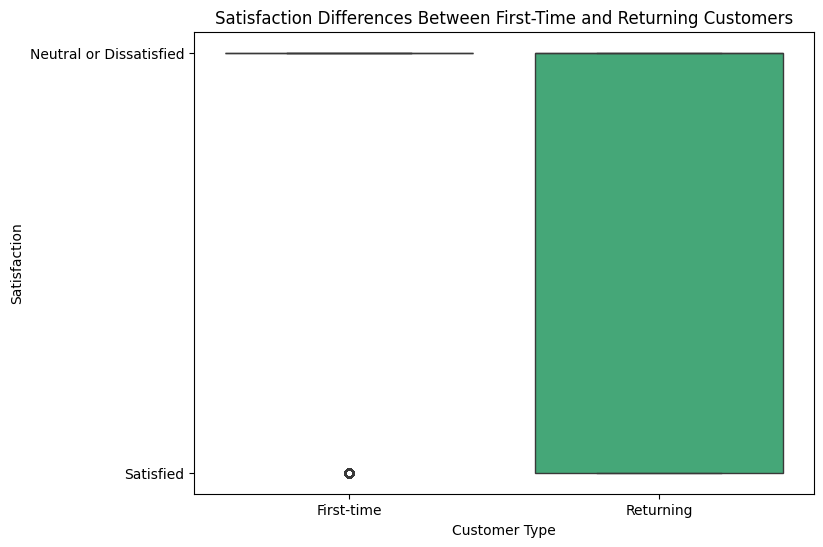

In [159]:
# Box plot of Satisfaction by Customer Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer_type', y='Satisfaction', data=df_data, palette='viridis')
plt.title('Satisfaction Differences Between First-Time and Returning Customers')
plt.xlabel('Customer Type')
plt.ylabel('Satisfaction')
plt.show()


Returning passengers tend to express higher levels of satisfaction compared to first-time passengers. This suggests that returning customers may have had positive prior experiences with the airline, leading to greater satisfaction and potentially higher levels of loyalty. Understanding and leveraging these higher satisfaction levels among returning passengers can be advantageous for the airline in fostering repeat business and maintaining customer loyalty over time.

<b><u>Research Question 7: Convenience Factors</b></U>
 

Correlation between departure delay and arrival delay: 0.9652911835463213


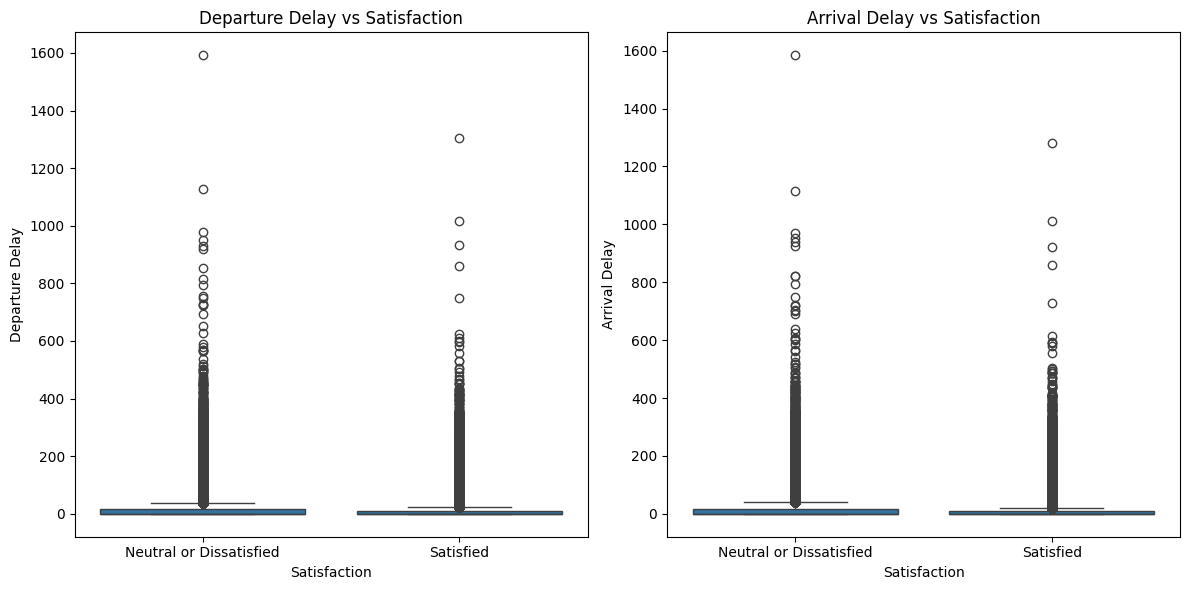

In [41]:
# Correlation between departure and arrival delays
correlation = df_data['Departure Delay'].corr(df_data['Arrival Delay'])
print(f'Correlation between departure delay and arrival delay: {correlation}')

# Impact of delays on satisfaction
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Satisfaction', y='Departure Delay', data=df_data)
plt.title('Departure Delay vs Satisfaction')

plt.subplot(1, 2, 2)
sns.boxplot(x='Satisfaction', y='Arrival Delay', data=df_data)
plt.title('Arrival Delay vs Satisfaction')

plt.tight_layout()
plt.show()


When there’s a departure delay, there’s usually an arrival delay too. The correlation coefficient of 0.97 shows a very strong connection between how late a flight leaves and how late it arrives. This means if a flight is delayed at departure, it’s highly likely to be delayed upon arrival as well.

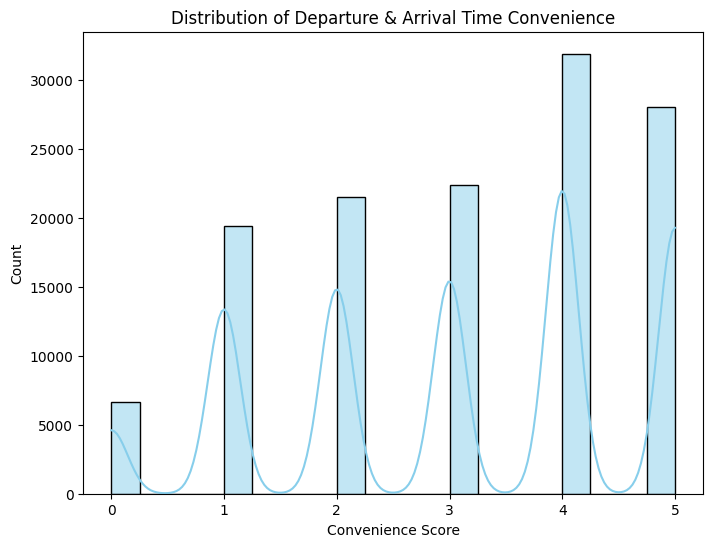

In [153]:
# Histogram of Departure & Arrival Time Convenience
#How does the convenience of departure and arrival times affect overall satisfaction?
plt.figure(figsize=(8, 6))
sns.histplot(df_data['Departure_&_Arrival_time_delay_convenience'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Departure & Arrival Time Convenience')
plt.xlabel('Convenience Score')
plt.ylabel('Count')
plt.show()


The graph shows a distribution of departure and arrival times based on convenience scores. It reveals that as convenience scores increase, indicating higher satisfaction with departure and arrival times, the number of instances also increases gradually. The highest count of instances, over 30,000, occurs at a convenience score of 4, suggesting this level is most common. A convenience score of 5, with 25,000 instances, indicates slightly lower but still significant satisfaction. Overall, the graph highlights preferences for departure and arrival times that align well with passengers' expectations and schedules, with convenience score 4 being particularly favorable among the analyzed data.

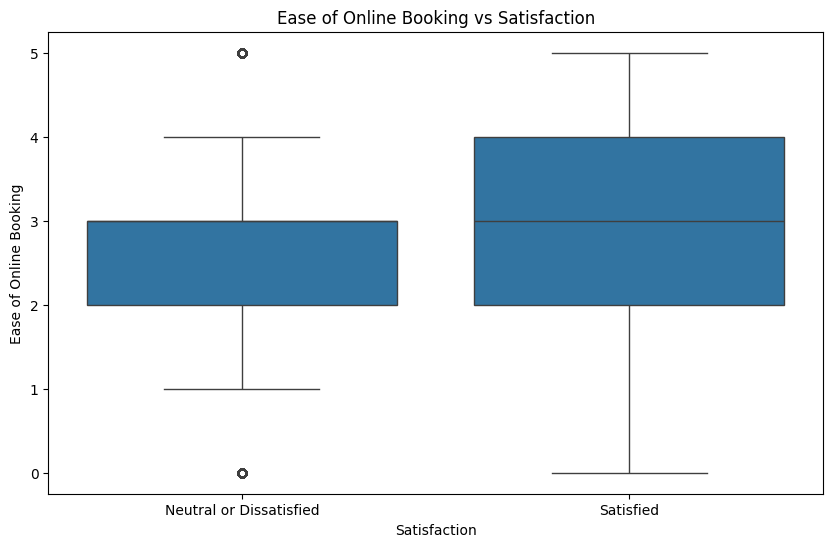

In [108]:

# Ease of online booking
plt.figure(figsize=(10, 6))
sns.boxplot(x='Satisfaction', y='Ease of Online Booking', data=df_data)
plt.title('Ease of Online Booking vs Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Ease of Online Booking')
plt.show()


The box plot shows that satisfaction levels exhibit a larger range or variability compared to dissatisfaction. This suggests that satisfaction among passengers varies more widely than dissatisfaction. Additionally, outliers represented as circles at both ends of the dissatisfaction plot indicate extreme instances where dissatisfaction levels are notably high or low compared to the majority of responses. Overall, the box plot provides insights into the distribution and extremes of satisfaction and dissatisfaction levels within the dataset analyzed.

<b><u>Research Question 8:Distance Impact</b></u>

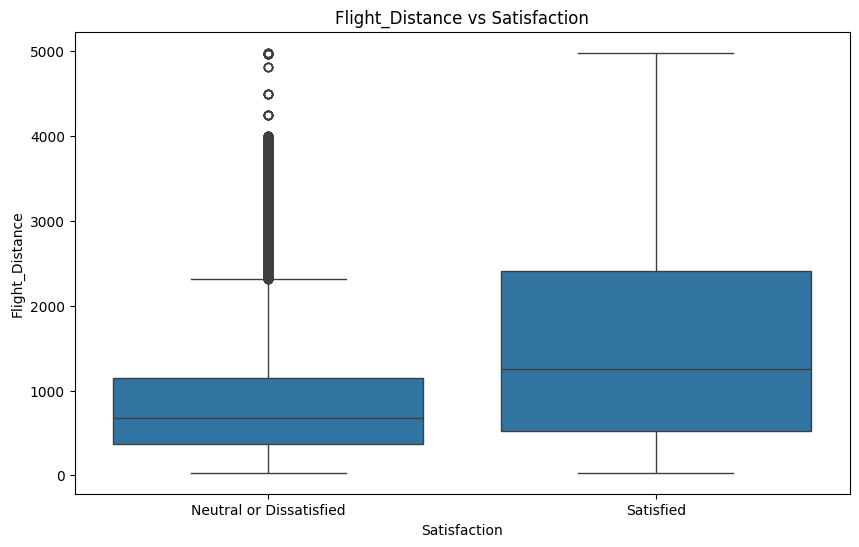

In [155]:
# Flight distance and satisfaction
#What is the relationship between flight distance and passenger satisfaction?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Satisfaction', y='Flight_Distance', data=df_data)
plt.title('Flight_Distance vs Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Flight_Distance')
plt.show()




The box plot reveals that, on average, satisfaction levels tend to increase as flight distance increases. This indicates a positive correlation between longer flight distances and higher passenger satisfaction. However, there are outliers in the neutral satisfaction range, suggesting variability where some passengers may not strongly associate flight distance alone with satisfaction. These outliers could reflect cases where other factors, such as service quality or personal preferences, play significant roles in passenger satisfaction despite the distance traveled. Understanding these nuances helps airlines focus on improving overall service quality and addressing specific passenger expectations across different flight distances.